In [23]:
import os
import cv2 as cv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
%matplotlib notebook

In [ ]:
masks=list( glob.glob("/content/drive/MyDrive/test/masks/*.jpg"))
images=list( glob.glob("/content/drive/MyDrive/test/images/*.jpg"))

In [ ]:
img=cv.imread(images[0])
img_gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh1 = cv.threshold(img_gray,0,20,cv.THRESH_OTSU)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0debcd1950>,
 Text(0.5, 0, 'Pixel intensity value'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Thresh Histogram'))

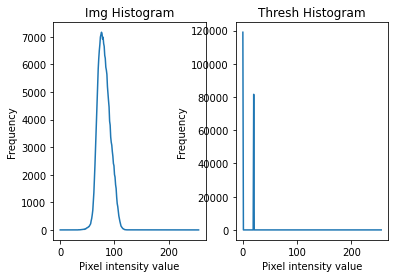

In [ ]:
hist=cv.calcHist([img],[0], None, [256], [0,256])
plt.subplot(121),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Img Histogram')
hist = cv.calcHist([thresh1],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Thresh Histogram')

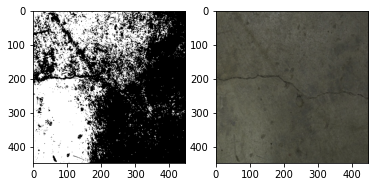

In [ ]:

f,axs=plt.subplots(1,2)
axs[0].imshow(thresh1,cmap='gray')
axs[1].imshow(img,cmap='gray')

In [ ]:
k=np.ones((3,3),np.uint8)
dil=cv.dilate(thresh1,k,iterations=1)
op=cv.morphologyEx(img,cv.MORPH_OPEN,k)


Text(0.5, 1.0, 'Opening')

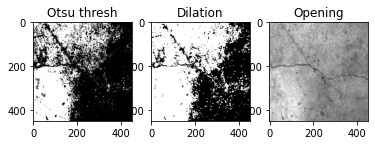

In [ ]:
f,axs=plt.subplots(1,3)
axs[0].imshow(thresh1,cmap='gray')
axs[0].set_title("Otsu thresh")
axs[1].imshow(dil,cmap='gray')
axs[1].set_title("Dilation")
axs[2].imshow(op,cmap='gray')
axs[2].set_title("Opening")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0df1d56e90>,
 Text(0.5, 0, 'Pixel intensity value'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Dil Histogram'))

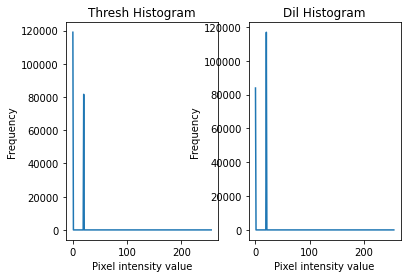

In [ ]:
hist=cv.calcHist([thresh1],[0], None, [256], [0,256])
plt.subplot(121),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Thresh Histogram')
hist = cv.calcHist([dil],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Dil Histogram')

Text(0.5, 1.0, 'Sobely')

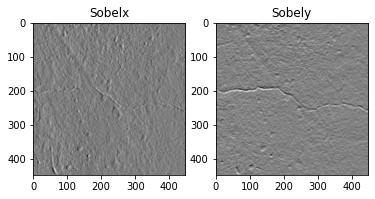

In [ ]:
img_gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(img_gray,(5,5),0)
sobelx = cv.Sobel(blur,cv.CV_64F,1,0,ksize=5)
sobely=cv.Sobel(blur,cv.CV_64F,0,1,ksize=5)
f,axs=plt.subplots(1,2)
axs[0].imshow(sobelx,cmap='gray')
axs[0].set_title("Sobelx")
axs[1].imshow(sobely,cmap='gray')
axs[1].set_title("Sobely")

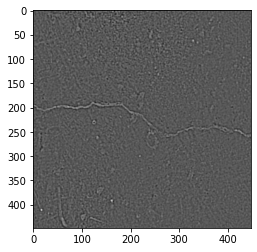

In [ ]:

lap= cv.Laplacian(blur,cv.CV_64F,ksize=5)
plt.imshow(lap,cmap='gray')

In [ ]:
lap=cv.morphologyEx(lap,cv.MORPH_CLOSE,k)
dil_l=cv.dilate(lap,k,iterations=4)
ero=cv.erode(dil_l,k,iterations=3)


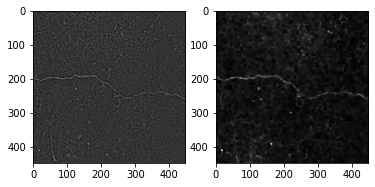

In [ ]:
f,axs=plt.subplots(1,2)
axs[0].imshow(lap,cmap='gray');
axs[1].imshow(ero,cmap='gray');

Text(0.5, 1.0, 'Processed Image')

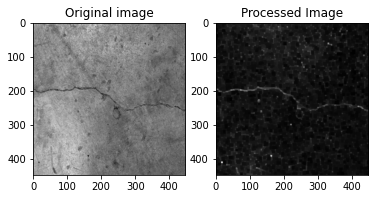

In [ ]:
f,axs=plt.subplots(1,2)
axs[0].imshow(img,cmap='gray')
axs[0].set_title("Original image")
axs[1].imshow(ero,cmap='gray')
axs[1].set_title("Processed Image")

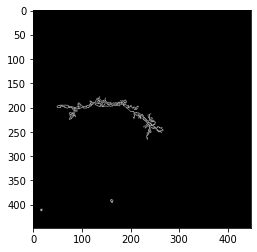

In [ ]:
canny=cv.Canny(img_gray,20,255)
plt.imshow(canny,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0deb7a4a10>,
 Text(0.5, 0, 'Pixel intensity value'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Canny Histogram'))

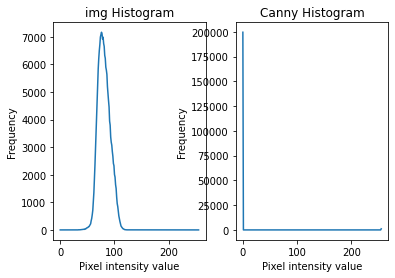

In [ ]:
hist=cv.calcHist([img],[0], None, [256], [0,256])
plt.subplot(121),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('img Histogram')
hist = cv.calcHist([canny],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Canny Histogram')

Image Histograms 

In [ ]:
img=cv.imread(images[0])

In [ ]:
img.shape

(448, 448, 3)

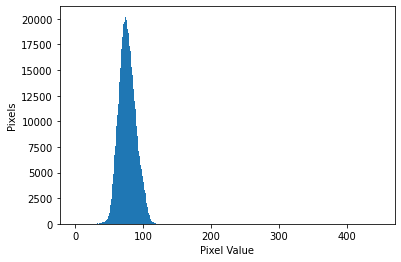

In [ ]:
plt.hist(img.ravel(),448,(0,448))
plt.xlabel("Pixel Value")
plt.ylabel("Pixels")
plt.show()

In [ ]:
mask=cv.imread(masks[0])


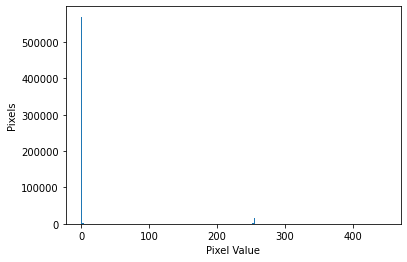

In [ ]:
plt.hist(mask.ravel(),448,(0,448))
plt.xlabel("Pixel Value")
plt.ylabel("Pixels")
plt.show()

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v=cv.split(hsv)

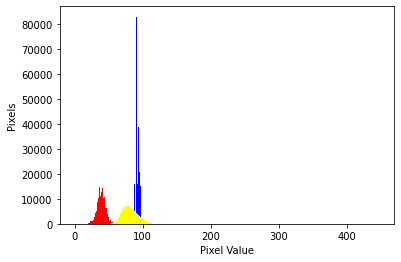

In [ ]:
plt.hist(h.ravel(),448,(0,448),color='blue')
plt.hist(s.ravel(),448,(0,448),color='red')
plt.hist(v.ravel(),448,(0,448),color='yellow')
plt.xlabel("Pixel Value")
plt.ylabel("Pixels")
plt.show()


In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


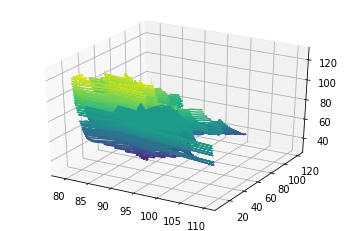

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.contour3D(h,s,v,50)

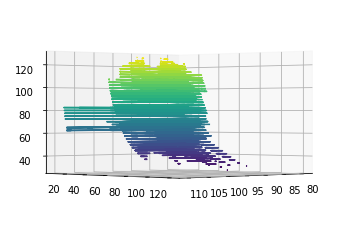

In [ ]:
ax.view_init(0,45)
fig

In [ ]:
x = np.linspace(0,448,448)

In [ ]:
x.shape

(448,)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0.92, 'Hue')

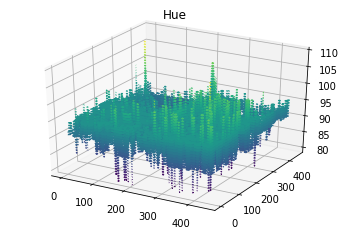

In [ ]:

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.contour3D(x,x,h,50)
ax.set_title("Hue")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0.92, 'Saturation')

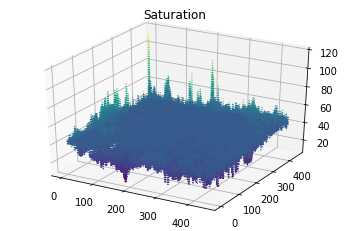

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.contour3D(x,x,s,50)
ax.set_title("Saturation")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0.92, 'Brightness')

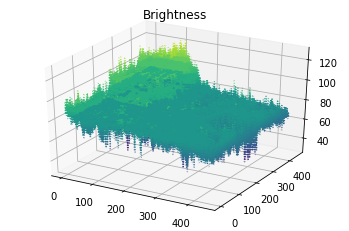

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.contour3D(x,x,v,50)
ax.set_title("Brightness")

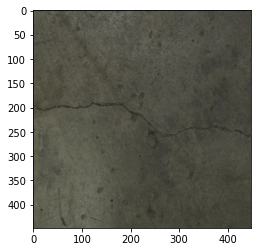

In [ ]:
plt.imshow(img)

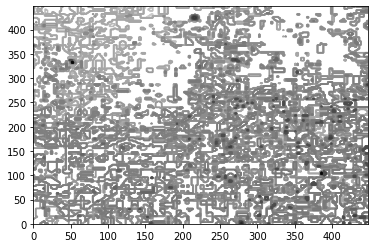

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.contour(x,x,h,50,cmap='binary')



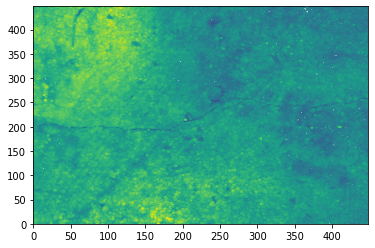

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.contour(x,x,v,50)
plt.colorbar()

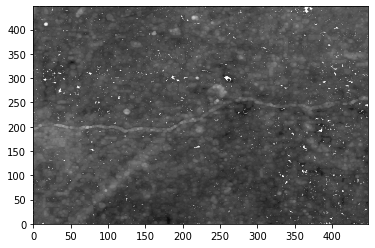

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.contour(x,x,s,50,cmap='gray')

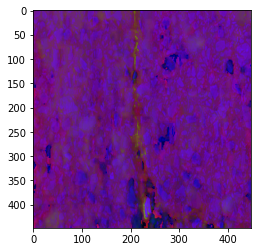

In [ ]:
hsv=d[0][0]
plt.imshow(hsv)

In [ ]:

l_green = np.array([0,0,0]) 
u_green =  np.array([250,255,80]) 
mask=cv.inRange(hsv,l_green,u_green)
res=cv.bitwise_and(hsv,hsv,mask=mask)


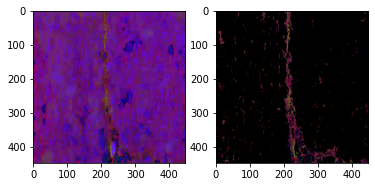

In [ ]:
f,axs=plt.subplots(1,2)
axs[0].imshow(hsv);
axs[1].imshow(res);

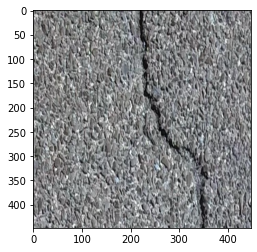

In [ ]:
img=cv.imread('/content/drive/MyDrive/test/images/test1.jpg')
plt.imshow(img);

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
l_green = np.array([0,0,0]) 
u_green =  np.array([250,255,90]) 
mask=cv.inRange(hsv,l_green,u_green)

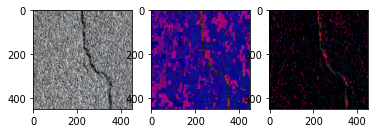

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mask=cv.inRange(hsv,l_green,u_green)
res=cv.bitwise_and(hsv,hsv,mask=mask)
f,axs=plt.subplots(1,3)
axs[0].imshow(img);
axs[1].imshow(hsv);
axs[2].imshow(res,cmap='gray');

In [28]:
path="/content/drive/MyDrive/test/images/test"

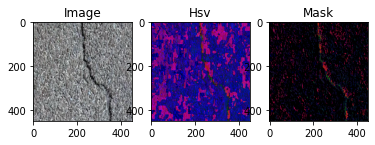

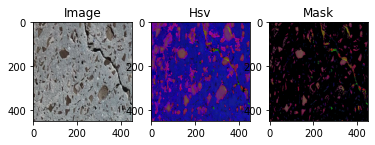

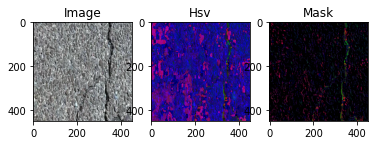

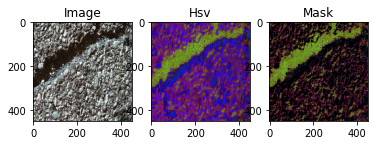

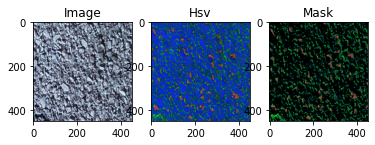

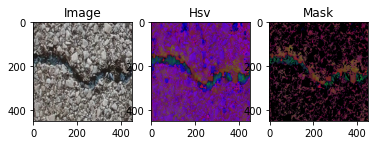

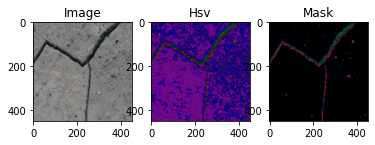

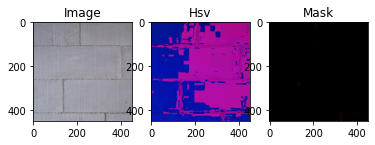

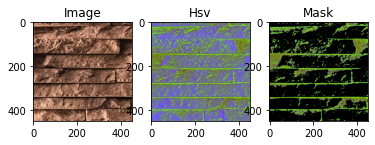

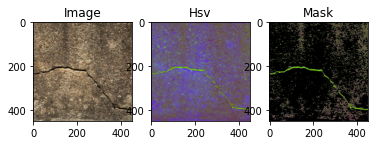

In [ ]:
for i in range(1,11):
  p=path+str(i)+".jpg"
  img=cv.imread(p)
  hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  mask=cv.inRange(hsv,l_green,u_green)
  res=cv.bitwise_and(hsv,hsv,mask=mask)
  f,axs=plt.subplots(1,3)
  axs[0].imshow(img);axs[0].set_title("Image")
  axs[1].imshow(hsv);axs[1].set_title("Hsv")
  axs[2].imshow(res,cmap='gray');axs[2].set_title("Mask")

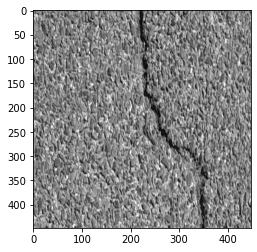

In [ ]:
img=cv.imread('/content/drive/MyDrive/test/images/test1.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray');

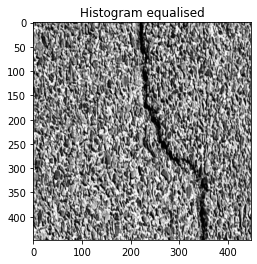

In [ ]:
res= cv.equalizeHist(gray)
plt.imshow(res,cmap='gray');
plt.title("Histogram equalised");

In [ ]:
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
res_c = cv.LUT(gray, table)

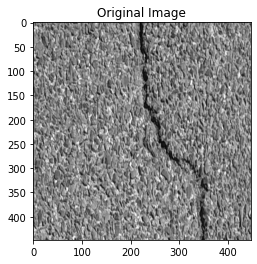

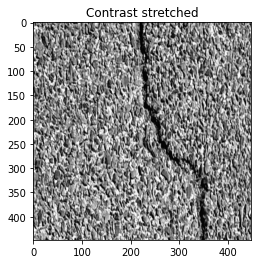

In [ ]:
plt.figure(),plt.imshow(gray,cmap='gray');plt.title("Original Image")
plt.figure(),plt.imshow(res_c,cmap='gray');plt.title("Contrast stretched");


In [ ]:
img=cv.imread('/content/drive/MyDrive/test/images/test7.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
res= cv.equalizeHist(gray)
res_c = cv.LUT(gray, table)

In [ ]:
m=cv.bitwise_and(res,res,mask=mask)
m_c=cv.bitwise_and(gray,gray,mask=mask)

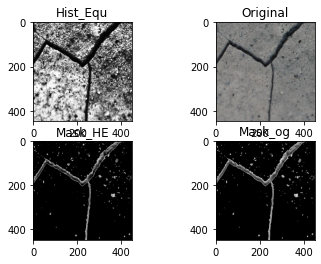

In [ ]:
f,axs=plt.subplots(2,2)
axs[0][0].imshow(res,cmap='gray');axs[0][0].set_title("Hist_Equ");
axs[0][1].imshow(img,cmap='gray');axs[0][1].set_title("Original");
axs[1][0].imshow(m,cmap='gray');axs[1][0].set_title("Mask_HE");
axs[1][1].imshow(m_c,cmap='gray');axs[1][1].set_title("Mask_og");

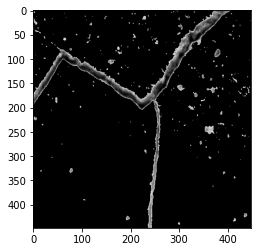

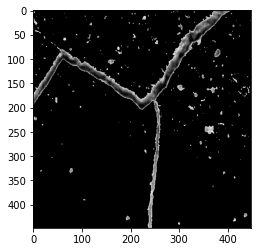

In [ ]:
m_he= cv.equalizeHist(m_c)
plt.figure(),plt.imshow(m,cmap='gray');
plt.figure(),plt.imshow(m_he,cmap='gray');

In [ ]:
def mask(hsv):
  l_green = np.array([0,0,0]) 
  u_green =  np.array([250,255,90]) 
  mask=cv.inRange(hsv,l_green,u_green)
  res=cv.bitwise_and(hsv,hsv,mask=mask)
  return res

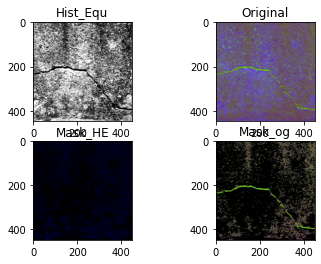

In [ ]:
img=cv.imread('/content/drive/MyDrive/test/images/test10.jpg')
gray_thin=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
res_thin= cv.equalizeHist(gray_thin)
hsv_o = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv_equ=cv.cvtColor(cv.cvtColor(res_thin,cv.COLOR_GRAY2BGR),cv.COLOR_BGR2HSV)
m_thin=mask(hsv_o)
m_cthin=mask(hsv_equ)
f,axs=plt.subplots(2,2)
axs[0][0].imshow(res_thin,cmap='gray');axs[0][0].set_title("Hist_Equ");
axs[0][1].imshow(hsv_o,cmap='gray');axs[0][1].set_title("Original");
axs[1][0].imshow(m_cthin,cmap='gray');axs[1][0].set_title("Mask_HE");
axs[1][1].imshow(m_thin,cmap='gray');axs[1][1].set_title("Mask_og");

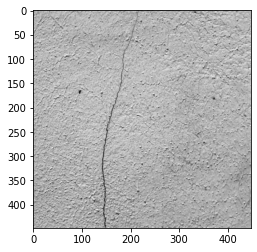

In [ ]:
img=cv.imread('/content/drive/MyDrive/test/images/thin.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray');

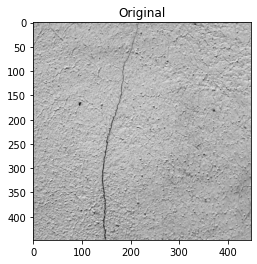

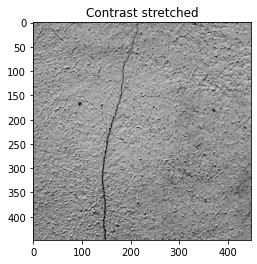

In [ ]:
res = cv.LUT(gray, table)
plt.figure(),plt.imshow(gray,cmap='gray');plt.title("Original");
plt.figure(),plt.imshow(res,cmap='gray');plt.title("Contrast stretched");


In [12]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
img=cv.imread('/content/drive/MyDrive/test/images/test1.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [25]:
detector = cv.SimpleBlobDetector_create()
keypoints = detector.detect(gray)
im_with_keypoints = cv.drawKeypoints(gray, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


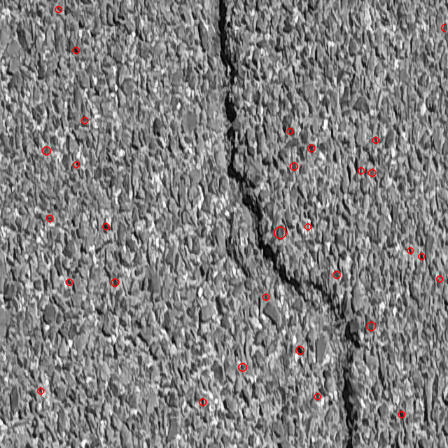

In [19]:

cv2_imshow( im_with_keypoints)

In [22]:
for i in range(1,11):
  p=path+str(i)+".jpg"
  img=cv.imread(p)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  keypoints = detector.detect(gray)
  im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  cv2_imshow(im_with_keypoints)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
params = cv.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 255;
# Filter by Area.
params.filterByArea = True
params.minArea = 100
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
# Create a detector with the parameters
ver = (cv.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv.SimpleBlobDetector(params)
else :
  detector = cv.SimpleBlobDetector_create(params)


In [35]:
for i in range(1,11):
  p=path+str(i)+".jpg"
  img=cv.imread(p)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  keypoints = detector.detect(gray)
  im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  cv2_imshow(im_with_keypoints)

Output hidden; open in https://colab.research.google.com to view.